In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.filters.rank import entropy 
from skimage.morphology import disk 
import glob 

import pickle 
from matplotlib import pyplot as plt 
h=100
w=128

In [3]:
def getred(img):
    ir=[]
    for i in range(h):
        for j in range(w):
            ir.append(img[i][j][0])
            #print(imgo[i][j],1)
    ir=np.array(ir)
    print(ir.shape)
    irr=np.reshape(ir,(h,w))
    irr.shape
    return irr
def getgreen(img):
  ig=[]
  for i in range(h):
      for j in range(w):
          ig.append(img[i][j][1])
          #print(imgo[i][j],2)
  ig=np.array(ig)
  print(ig.shape)
  igg=np.reshape(ig,(h,w))
  igg.shape
  return igg
def getblue(img):
  ib=[]
  for i in range(h):
      for j in range(w):
          ib.append(img[i][j][2])
          #print(imgo[i][j],3)
  ib=np.array(ib)
  print(ib.shape)
  ibb=np.reshape(ib,(h,w))
  ibb.shape  
  return ibb

In [8]:
import numpy as np
import cv2
import pandas as pd

def feature_extraction(img):
    df = pd.DataFrame()
#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe
    print(df)

    return df

# Red

C:\Users\sudhakararao\Desktop\Project\segfirst\1seg.jpeg
C:\Users\sudhakararao\Desktop\Project\segfirst\2seg.jpeg
C:\Users\sudhakararao\Desktop\Project\segfirst\3seg.jpeg
C:\Users\sudhakararao\Desktop\Project\segfirst\4seg.jpeg
C:\Users\sudhakararao\Desktop\Project\segfirst\5seg.jpg
C:\Users\sudhakararao\Desktop\Project\segfirst\6seg.jpeg
C:\Users\sudhakararao\Desktop\Project\segfirst\7seg.jpeg
C:\Users\sudhakararao\Desktop\Project\segfirst\8seg.jpeg
8
C:\Users\sudhakararao\Desktop\Project\segsecond\org1.jpeg
C:\Users\sudhakararao\Desktop\Project\segsecond\org2.jpeg
C:\Users\sudhakararao\Desktop\Project\segsecond\org3.jpeg
C:\Users\sudhakararao\Desktop\Project\segsecond\org4.jpeg
C:\Users\sudhakararao\Desktop\Project\segsecond\org5.jpg
C:\Users\sudhakararao\Desktop\Project\segsecond\org6.jpeg
C:\Users\sudhakararao\Desktop\Project\segsecond\org7.jpeg
C:\Users\sudhakararao\Desktop\Project\segsecond\org8.jpeg
8


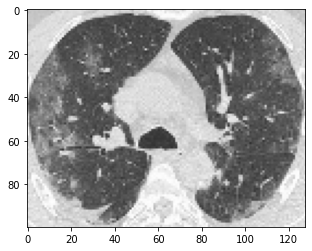

In [5]:
path=r'C:\Users\sudhakararao\Desktop\Project'
l=['segfirst','segsecond']
all1=[]
for i in l:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset):
        imagepath=os.path.join(dataset,j)
        print(imagepath)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all1.append(img)
        c+=1
    print(c)

(12800,)
       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                   0       0       0       0       0       0       0       0   
1                   0       0       0       0       0       0       0       0   
2                   0       0       0       0       0       0       0       0   
3                   0       0       0       0       0       0       0       0   
4                   0       0       0       0       0       0       0       0   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             221       0       0     255     255     255     200     148   
12796             214       0       0     255     255     255     198     147   
12797             210       0       0     255     255     255     196     146   
12798             221       0       0     255     255     255     195     144   
12799             206       0       0     255     255     255     195     145   

       Gabor8  Gab

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_20776/2095656607.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


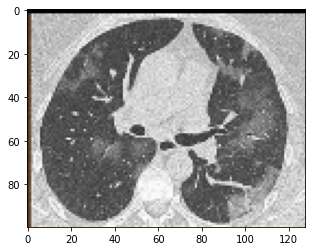

In [9]:
img_datared=pd.DataFrame()
for i in range(8,16):
    dfr=pd.DataFrame()
    dfr = feature_extraction(getred(all1[i]))
    img_datared=img_datared.append(dfr)
    plt.imshow(all1[i])
    break

(12800,)
(12800,)
(12800,)
(12800,)
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_2168/308088759.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_2168/308088759.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_2168/308088759.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_2168/308088759.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Lo

(12800,)
(12800,)
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_2168/308088759.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_2168/308088759.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_2168/308088759.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)


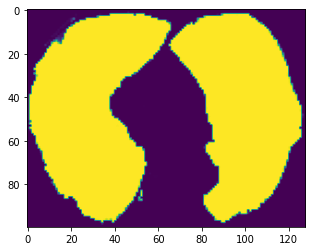

In [21]:
imgo_datared=pd.DataFrame()
for i in range(0,8): 
    dfro = getred(all1[i])
    plt.imshow(dfro)
    io=  dfro.reshape(-1)
    dfred=pd.DataFrame()
    dfred['label']=io 
    imgo_datared=imgo_datared.append(dfred)
datasetred=pd.concat([img_datared,imgo_datared], axis=1)

In [22]:
Y=datasetred['label'].values
X=datasetred.drop(labels = ['label'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=30,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [25]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Median s3         0.153764
Gaussian s3       0.118087
Gaussian s7       0.079682
Gabor8            0.077739
Gabor6            0.073255
Gabor24           0.053509
Gabor29           0.047899
Gabor7            0.041699
Original Image    0.040198
Sobel             0.035440
Gabor5            0.033500
Prewitt           0.033124
Scharr            0.032396
Gabor31           0.031704
Variance s3       0.027346
Roberts           0.026524
Gabor21           0.023206
Gabor32           0.021877
Gabor30           0.018956
Gabor23           0.012440
Gabor4            0.009162
Gabor22           0.003348
Canny Edge        0.002919
Gabor12           0.000839
Gabor3            0.000406
Gabor11           0.000325
Gabor19           0.000261
Gabor28           0.000242
Gabor27           0.000102
Gabor20           0.000051
Gabor16           0.000000
Gabor13           0.000000
Gabor26           0.000000
Gabor25           0.000000
Gabor14           0.000000
Gabor1            0.000000
Gabor10           0.000000
G

In [26]:
pre=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pre))

0.8216796875


In [27]:
pre_r=model.predict(X[0:w*h])
pre_r

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

0.9884375


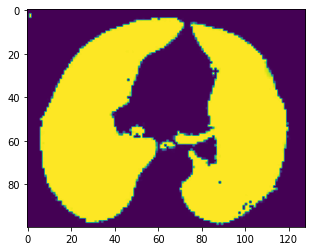

In [28]:
s=pre_r[0:h*w].reshape((h,w))
plt.imshow(s) 
from sklearn import metrics
print(metrics.accuracy_score(Y[0:w*h],pre_r))

In [29]:
import pickle
filename = "binary_model"
pickle.dump(model, open(filename, 'wb')) 

# Validation

In [1]:
import pickle
model_r=pickle.load(open('rr_model','rb')) 

In [2]:
path=r'C:\Users\sudhakararao\Desktop\Project\divideddataset'
#l=['positive-hometratment','positive-hospitalize','positive-icu']
l1=['damaged']
all2=[]
for i in l1:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset): 
        imagepath=os.path.join(dataset,j)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all2.append(img)
        #print(c,end=" ")
        print(imagepath)
        c+=1
        if(c==10):
            break

NameError: name 'os' is not defined

In [ ]:
ck=9
plt.imshow(all2[ck])

In [ ]:
imgr=getred(all2[ck])
dfr = feature_extraction(imgr)
pre_r=model_r.predict(dfr)
s_r=pre_r.reshape((h,w))
print(len(pre_r))
plt.imshow(s_r,cmap='gray')

# leftlung

In [65]:
print(s_r[0],len(s_r[0]))

[255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   2   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0] 128


In [66]:
mid=w//2+1
sum_left=0
for i in range(h):
    count=0
    for j in range(mid):
        #print(s_r[i][j],end=" ")
        if(s_r[i][j]>=200):
            count=count+1
    sum_left+=count
    #print(len(s_r[i]),end=" ")
    #print(count,sum_left)

In [67]:
totalpix=mid*h
result=(sum_left/totalpix)*100
print(sum_left,result) 

2594 39.90769230769231


# right lung

In [68]:
mid1=mid+1
end=w
sum_right=0
for i in range(h):
    count=0
    for j in range(mid1,end):
        #print(s_r[i][j],end=" ")
        if(s_r[i][j]>=200):
            count=count+1
    sum_right+=count
    #print(len(s_r[i]),end=" ")
    #print(count,sum_left)

In [69]:
totalpix1=(mid+1)*h
result1=(sum_right/totalpix)*100
print(sum_right,result1) 

1788 27.507692307692306


# Results

In [70]:
def tumor(result,a):
    if(result>=50):
        print("No tumors in "+a+" lung")
    elif(result<50 and result>=40):
        print("Stage-1 tumors in "+a+" lung")
    elif(result<40 and result>=25):
        print("Stage-2 tumors in "+a+" lung")
    elif(result<25 and result>=15):
        print("Stage-3 tumors in "+a+" lung")
    elif(result<15):
        print("Stage-4 tumors in "+a+" lung")

In [71]:
tumor(result,'left')
tumor(result1,'right')

Stage-2 tumors in left lung
Stage-2 tumors in right lung


In [72]:
ans=min(result,result1)
tumor(ans,'overall')

Stage-2 tumors in overall lung


In [73]:
total_pix=sum_left+sum_right
print(total_pix)


4382


In [74]:
import pickle
pickle.dump(total_pix,open('sum_pix.pkl','wb'))

In [48]:
# ck=5
# x=23
# y=18
# #plt.imshow(all2[ck])
# x1,y1=x+90,y+50
# image=all2[ck][y:y1+1,x:x1+1]

# image=cv2.resize(image,(w,h))
# plt.imshow(image)